# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)
- [Hadley Wickham's famous paper](http://vita.had.co.nz/papers/tidy-data.html) on Tidy Data

**Always start with imports**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

## Part 1: Simple Examples 

### 1.1 Concatenate
Concatenate sticks dataframes together, either on top of each other, or next to each other.

First, let's create two dataframes, `df1` and `df2`.

In [2]:
# Create df1
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1.head()

,letter,number
0,a,1
1,b,2


In [3]:
# Create df2
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2.head()

,letter,number
0,c,3
1,d,4


In [4]:
# Next, let's stick the dataframes on top of each other using `concat`.
# `axis=0` indicates a row operation. Note that 'axis=0' is the default and doesn't have to be specified.
df3=pd.concat([df1, df2], axis=0) 
df3

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


In [5]:
# Finally, let's stick the dataframes next to each other using `concat`. 
# Here, `axis=1` indicates a column operation.
df4=pd.concat([df1, df2], axis=1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


### 1.2 Merge

Merging joins two datasets together based on a common key.

In [6]:
# stock names
stockname = pd.DataFrame({'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL'], 'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google']})
stockname

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [7]:
# stock prices.
openprice = pd.DataFrame({'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN'], 'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34]})
openprice

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [8]:
# Merge these dataframes.
named_stocks=pd.merge(openprice,  stockname)
named_stocks

,Symbol,OpenPrice,Name
0,AAPL,217.51,Apple
1,MSFT,96.54,Microsoft
2,GOOGL,501.30,Google
3,FB,51.45,Facebook
4,AMZN,1703.34,Amazon


In [9]:
# Create a 3rd dataset of weekly highs
wkhigh = pd.DataFrame({'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX'], '52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22]})
wkhigh

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


The 'on' parameter indicates a specific column that is contained in both dataframes. We use it to look up and copy information from the two df's into a combined df.

In [10]:
# Now merge that with the named stocks.
full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='outer')
# full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='left')
# full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='inner')
# full_stocks=pd.merge(named_stocks, wkhigh, on='Symbol', how='right')
full_stocks

,Symbol,OpenPrice,Name,52wkHigh
0,AAPL,217.51,Apple,233.47
1,MSFT,96.54,Microsoft,110.11
2,GOOGL,501.30,Google,NaN
3,FB,51.45,Facebook,60.79
4,AMZN,1703.34,Amazon,2050.49
5,NFLX,NaN,NaN,303.22


The 'how' parameter indicates what the portion of the selected dataframes to keep after the merge takes place.  
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

In [11]:
# This is code to display a `.png` inside of a jupyter notebook.
from IPython.display import display, Image
url = 'https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg'
venn_diagram = Image(url=url, width=600)
display(venn_diagram)

### 1.3 Reshape: `melt` and `pivot_table`



Why reshape data?

**Some libraries prefer data in different formats**



> For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).  
[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets)    
This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

Data science is often about putting square pegs in round holes. Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

**Hadley Wickham: 'wide' format vs. 'tidy' format**  
From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [12]:
# Let's create a simple table.

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild.   
The table has two columns and three rows, and both rows and columns are labelled."

In [13]:
# This is an example of 'wide' format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data.   
Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [14]:
# Exactly the same information can be displayed by transposing the table. 
# (this is also another form of 'wide' format)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Table 3 is an example of 'tidy' format. It reorganises Table 1  to make the values, variables and obserations more clear.

Table 3 is the 'tidy' version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

**Table 1 --> Tidy**

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [15]:
# First, get the column names as a list.
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [16]:
# Now get the index values as another list.
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [17]:
# For table 1, convert the index into a column using the `reset_index` method.
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [18]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [19]:
# rename the columns
tidy = tidy.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
# shorten the `trt` values
tidy.trt = tidy.trt.str.replace('treatment', '')
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


**Table 2 --> Tidy**

In [20]:
# first you can transpose it
table2.T

,treatmenta,treatmentb
John Smith,NaN,2.0
Jane Doe,16.0,11.0
Mary Johnson,3.0,1.0


In [21]:
# now use "melt" and give it some new column names
tidy2 = table2.T.reset_index().melt(id_vars='index').rename(columns= {
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy2

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [22]:
# now clean up the column names etc.
tidy2['trt'] = tidy2['trt'].str.replace('treatment', '')
tidy2 = tidy2.set_index('name')
tidy2

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


**Tidy --> Table 1**

The `pivot_table` function is the inverse of `melt`.

In [23]:
# Let's do it all in reverse.
wide = tidy.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


**Tidy --> Table 2**

In [24]:
# Do the same thing you did to table 1, but then transpose it when you're finished
tidy2.pivot_table(index='name', columns='trt', values='result').T

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


**Seaborn example**

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

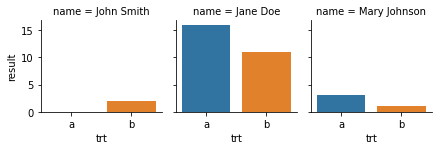

In [25]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Part 2: More complex examples 

### 2.1 Concatenating time-series datasets from Chicago

In [26]:
# Here's some data about Chicago bikesharing.
source_path='https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/Divvy_Trips_dataset/'
q1_path=source_path + 'Divvy_Trips_2015-Q1.csv'
q2_path=source_path + 'Divvy_Trips_2015-Q2.csv'
q3_path=source_path + 'Divvy_Trips_2015-Q3.csv'
q4_path=source_path + 'Divvy_Trips_2015-Q4.csv'

In [27]:
# Let's take a look at the first quarter.
q1 = pd.read_csv(q1_path)
print(q1.shape)
q1.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4607895,3/12/2015 7:11,3/12/2015 7:16,2058,322,75,Canal St & Jackson Blvd,284,Michigan Ave & Jackson Blvd,Subscriber,Male,1960.0
1,4467889,1/22/2015 17:07,1/22/2015 17:10,2499,178,16,Wood St & North Ave,58,Marshfield Ave & Cortland St,Subscriber,Male,1977.0
2,4644042,3/16/2015 10:30,3/16/2015 10:36,369,346,91,Clinton St & Washington Blvd,100,Orleans St & Merchandise Mart Plaza,Subscriber,Male,1986.0
3,4598015,3/10/2015 17:19,3/10/2015 17:36,857,1048,134,Peoria St & Jackson Blvd,128,Damen Ave & Chicago Ave,Subscriber,Male,1984.0
4,4467863,1/22/2015 17:02,1/22/2015 17:12,2241,611,52,Michigan Ave & Lake St,192,Canal St & Adams St,Subscriber,Male,1963.0


In [28]:
# how about the second quarter?
q2 = pd.read_csv(q2_path)
print(q2.shape)
q2.head()

(1000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,5019758,5/2/2015 10:05,5/2/2015 10:14,72,545,223,Clifton Ave & Armitage Ave,349,Halsted St & Wrightwood Ave,Subscriber,Male,1978.0
1,4874907,4/15/2015 17:21,4/15/2015 17:26,2683,304,197,Michigan Ave & Madison St,174,Canal St & Madison St,Subscriber,Male,1964.0
2,5149598,5/14/2015 6:23,5/14/2015 6:37,3404,806,273,Michigan Ave & 16th St,192,Canal St & Adams St,Subscriber,Male,1982.0
3,5127077,5/12/2015 6:33,5/12/2015 6:55,2374,1342,305,Western Ave & Division St,24,Fairbanks Ct & Grand Ave,Subscriber,Female,1989.0
4,4776193,4/4/2015 19:16,4/4/2015 19:39,2848,1432,85,Michigan Ave & Oak St,304,Broadway & Waveland Ave,Subscriber,Male,1978.0


In [29]:
# Do they have exactly the same columns?
print(q1.columns)
print(q2.columns)

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')
Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')


In [30]:
# Let's define a function to check if they're REALLY equal.
def difference_checker(list1, list2):
    difference = list(set(list1) - set(list2))
    print ('The difference is: ', difference)

difference_checker(q1.columns, q2.columns)

The difference is:  []


In [31]:
# Now we're sure they're equal, let's concatenate them.
q1_q2=pd.concat([q1, q2], axis=0)
q1_q2.shape

(2000, 12)

In [32]:
# Confirm that did what we wanted it to.
print(q1.shape)
print(q2.shape)
print(q1_q2.shape)

(1000, 12)
(1000, 12)
(2000, 12)


In [33]:
# Now add quarters 3 and 4, as well.
q3 = pd.read_csv(q3_path)
q4 = pd.read_csv(q4_path)

allbikes=pd.concat([q1, q2, q3, q4], axis=0)
print(allbikes.shape)
allbikes.sample(4)

(4000, 12)


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
17,7790440,10/5/2015 8:02,10/5/2015 8:25,3658,1381,192,Canal St & Adams St,145,Mies van der Rohe Way & Chestnut St,Subscriber,Male,1955.0
865,7730667,9/30/2015 6:40,9/30/2015 6:57,2849,1001,350,Ashland Ave & Chicago Ave,191,Canal St & Monroe St,Subscriber,Male,1988.0
642,7215134,8/31/2015 17:23,8/31/2015 17:30,4146,410,181,LaSalle St & Illinois St,140,Dearborn Pkwy & Delaware Pl,Subscriber,Female,1989.0
761,7255154,9/2/2015 18:54,9/2/2015 19:05,3293,659,229,Southport Ave & Roscoe St,188,Greenview Ave & Fullerton Ave,Subscriber,Male,1987.0


### Working with datetime objects

In [34]:
# Start time is an "object" time
allbikes['starttime'].dtype

dtype('O')

In [35]:
# Convert to datetime format and make it into a weekday
allbikes['date'] = pd.to_datetime(allbikes['starttime']).dt.date
allbikes[['starttime', 'date']].head(3)

,starttime,date
0,3/12/2015 7:11,2015-03-12
1,1/22/2015 17:07,2015-01-22
2,3/16/2015 10:30,2015-03-16


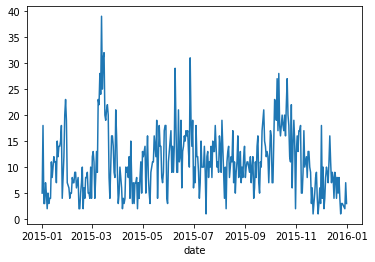

In [36]:
# Display a line chart with that info
allbikes.groupby(['date'])['trip_id'].count().plot();

In [37]:
# Convert to datetime format and make it into a month
allbikes['month'] = pd.to_datetime(allbikes['starttime']).dt.month
allbikes[['starttime', 'date', 'month']].head(3)

,starttime,date,month
0,3/12/2015 7:11,2015-03-12,3
1,1/22/2015 17:07,2015-01-22,1
2,3/16/2015 10:30,2015-03-16,3


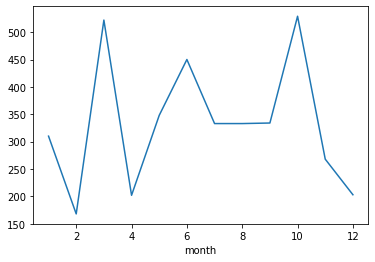

In [38]:
# Display a line chart with that info
allbikes.groupby(['month'])['trip_id'].count().plot();

In [39]:
# Convert to datetime format and make it into a weekday
# The day of the week with Monday=0, Sunday=6.
allbikes['weekday'] = pd.to_datetime(allbikes['starttime']).dt.weekday
allbikes['weekday'].value_counts().sort_index()

0    605
1    602
2    612
3    555
4    603
5    538
6    485
Name: weekday, dtype: int64

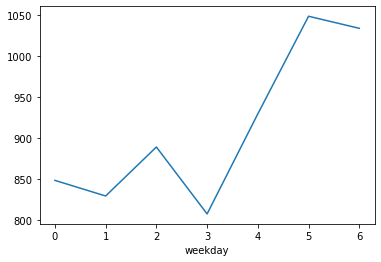

In [40]:
# Display a line chart with that info
allbikes.groupby(['weekday'])['tripduration'].mean().plot();

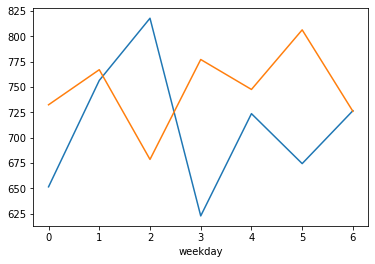

In [41]:
# Do men and women have different cycling patterns?
allbikes[allbikes['gender']=='Male'].groupby(['weekday'])['tripduration'].mean().plot();
allbikes[allbikes['gender']=='Female'].groupby(['weekday'])['tripduration'].mean().plot();


### 2.2 Merging datasets about counties
Original sources:  
https://www.kaggle.com/muonneutrino/us-census-demographic-data/download  
https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [42]:
# Get some population data about counties from the Census Bureau
source1='https://raw.githubusercontent.com/austinlasseter/dash-virginia-counties/master/resources/acs2017_county_data.csv'

In [43]:
# Read that into Pandas, and check out 5 rows.
census=pd.read_csv(source1)
census.sample(5)

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2095,39105,Ohio,Meigs County,23234,11517,11717,0.6,96.8,1.2,0.1,...,1.4,0.4,4.1,30.9,8891,73.1,19.2,7.5,0.2,10.4
1703,31099,Nebraska,Kearney County,6547,3229,3318,5.8,92.7,0.1,0.3,...,3.1,0.9,6.3,18.4,3470,77.6,11.4,10.4,0.6,3.4
2918,51540,Virginia,Charlottesville city,46487,22336,24151,5.2,65.7,18.7,0.3,...,12.5,5.0,6.5,17.8,24447,69.1,24.7,6.3,0.0,3.6
351,12065,Florida,Jefferson County,14085,7554,6531,4.0,58.2,35.1,0.4,...,0.6,0.4,4.2,28.7,4922,65.5,28.9,5.6,0.0,7.2
1044,21103,Kentucky,Henry County,15677,7715,7962,3.2,91.8,3.5,0.3,...,1.1,0.6,3.5,30.5,7143,79.4,12.1,8.2,0.3,6.5


In [44]:
# What are all the columns?
print(census.columns)

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


In [45]:
# Let's restrict that to just a few columns, for a simple analysis about commute times
commute=census[['CountyId', 'State', 'County', 'MeanCommute']]

In [46]:
# What's the average commute in the USA?
commute['MeanCommute'].mean()

23.47453416149071

In [47]:
# Now let's augment that with some outside data from USDA.
source2='https://github.com/austinlasseter/dash-virginia-counties/blob/master/resources/ruralurbancodes2013.xls?raw=true'

In [48]:
# Take a look at that new data.
usda=pd.read_excel(source2)
usda.sample(5)

,FIPS,State,County_Name,Population_2010,RUCC_2013,Description
856,19135,IA,Monroe County,7970,7,"Nonmetro - Urban population of 2,500 to 19,999..."
155,5089,AR,Marion County,16653,9,"Nonmetro - Completely rural or less than 2,500..."
3108,55119,WI,Taylor County,20689,6,"Nonmetro - Urban population of 2,500 to 19,999..."
1851,36047,NY,Kings County,2504700,1,Metro - Counties in metro areas of 1 million p...
222,6073,CA,San Diego County,3095313,1,Metro - Counties in metro areas of 1 million p...


In [49]:
# What are those RUCC codes all about?
usda.groupby('RUCC_2013')[['Description']].max()

,Description
RUCC_2013,
1,Metro - Counties in metro areas of 1 million p...
2,"Metro - Counties in metro areas of 250,000 to ..."
3,Metro - Counties in metro areas of fewer than ...
4,"Nonmetro - Urban population of 20,000 or more,..."
5,"Nonmetro - Urban population of 20,000 or more,..."
6,"Nonmetro - Urban population of 2,500 to 19,999..."
7,"Nonmetro - Urban population of 2,500 to 19,999..."
8,"Nonmetro - Completely rural or less than 2,500..."
9,"Nonmetro - Completely rural or less than 2,500..."


In [50]:
# Let's shrink that USDA data to just the columns we need.
usda=usda[['FIPS', 'RUCC_2013']]

In [51]:
# Let's merge that with our census data about commute times.
metro_commute=pd.merge(commute, usda, left_on='CountyId', right_on='FIPS', how='left')
metro_commute.sample(5)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
2884,51135,Virginia,Nottoway County,25.4,51135.0,6.0
2827,51015,Virginia,Augusta County,23.7,51015.0,3.0
155,5089,Arkansas,Marion County,22.1,5089.0,9.0
516,13263,Georgia,Talbot County,34.5,13263.0,8.0
3135,56033,Wyoming,Sheridan County,16.0,56033.0,7.0


In [52]:
# Is there any difference in commutes by rural-urban designation?
drivetimes=metro_commute.groupby('RUCC_2013')[['MeanCommute']].mean()
drivetimes

,MeanCommute
RUCC_2013,
1.0,29.513347
2.0,24.721066
3.0,22.864499
4.0,22.332258
5.0,18.686957
6.0,23.877013
7.0,19.532488
8.0,25.707727
9.0,20.113679


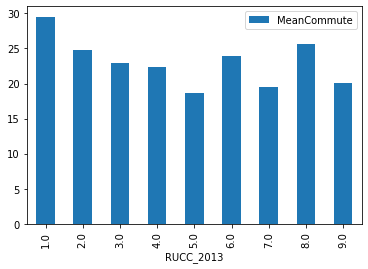

In [53]:
# Display that using the Pandas plotting function.
drivetimes.plot(kind='bar');

In [54]:
# Compare two states
two_states = metro_commute[(metro_commute['State']=='Virginia') | (metro_commute['State']=='Oregon')]
two_states.sample(6)

,CountyId,State,County,MeanCommute,FIPS,RUCC_2013
2944,51760,Virginia,Richmond city,21.9,51760.0,1.0
2926,51620,Virginia,Franklin city,26.2,51620.0,6.0
2952,51840,Virginia,Winchester city,24.8,51840.0,3.0
2221,41027,Oregon,Hood River County,17.4,41027.0,6.0
2864,51091,Virginia,Highland County,22.5,51091.0,8.0
2904,51177,Virginia,Spotsylvania County,38.2,51177.0,1.0


In [55]:
# Is there any difference in commutes by rural-urban designation?
drivetimes=two_states.groupby(['State','RUCC_2013'])[['MeanCommute']].mean()
drivetimes

MeanCommute
State    RUCC_2013             
Oregon   1.0          27.880000
         2.0          22.666667
         3.0          19.840000
         4.0          18.866667
         5.0          18.066667
         6.0          19.571429
         7.0          15.760000
         9.0          18.660000
Virginia 1.0          30.108333
         2.0          25.557143
         3.0          24.811111
         4.0          22.175000
         5.0          23.900000
         6.0          27.065000
         7.0          22.271429
         8.0          30.264286
         9.0          27.585714

**Table 1 --> Tidy**

We can use the pandas `melt` function to reshape the table into Tidy format.

In [56]:
# First, convert the index into columns.
tidydrive = drivetimes.T.reset_index().melt(id_vars='index').rename(columns= {
    'State': 'state', 
    'RUCC_2013': 'rural', 
    'MeanCommute': 'mean_commute'
})
tidydrive = tidydrive.drop('index', axis=1)
tidydrive

,state,rural,value
0,Oregon,1.0,27.880000
1,Oregon,2.0,22.666667
2,Oregon,3.0,19.840000
3,Oregon,4.0,18.866667
4,Oregon,5.0,18.066667
5,Oregon,6.0,19.571429
6,Oregon,7.0,15.760000
7,Oregon,9.0,18.660000
8,Virginia,1.0,30.108333
9,Virginia,2.0,25.557143


In [57]:
# Let's do it all in reverse.
widedrive = tidydrive.pivot_table(index='rural', columns='state', values='value')
widedrive.reset_index(level=0, inplace=True)
widedrive

state,rural,Oregon,Virginia
0,1.0,27.880000,30.108333
1,2.0,22.666667,25.557143
2,3.0,19.840000,24.811111
3,4.0,18.866667,22.175000
4,5.0,18.066667,23.900000
5,6.0,19.571429,27.065000
6,7.0,15.760000,22.271429
7,8.0,NaN,30.264286
8,9.0,18.660000,27.585714


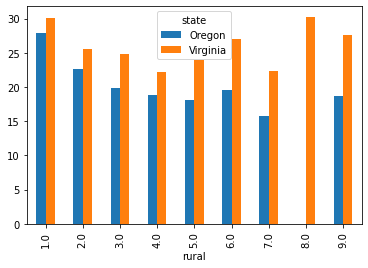

In [58]:
# Display that using the Pandas plotting function.
widedrive.plot(x='rural', y=['Oregon', 'Virginia'], kind='bar');